# Closed Form Linear Regression on Housing

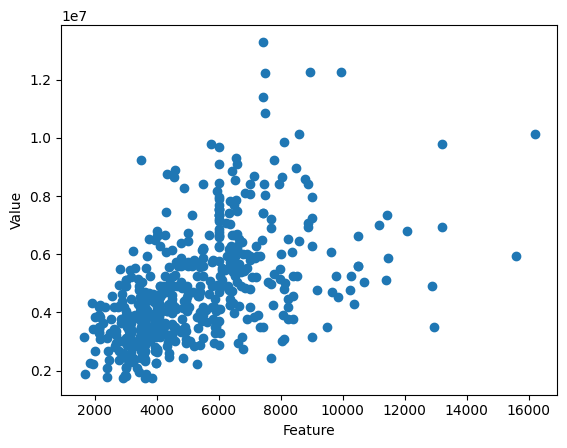

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Importing the dataset
dataset = pd.read_csv('Housing.csv')
X = dataset.iloc[:, 1].values
Y = dataset.iloc[:, 0].values
n_samples=X.shape[0]
#Reshaping Dataset and label

X=X.reshape(n_samples,1)
Y=Y.reshape(n_samples,1)
ones=np.ones((n_samples,1))
X=np.hstack((ones,X))

plt.scatter(X[:,1],Y)
plt.xlabel("Feature")
plt.ylabel("Value")
plt.show()

## Splitting data into train and test


In [ ]:
def test_train_split(data,target,split_perc):
  perm=np.random.permutation(len(data)) #to get random permutation of 0 to len-1
  x_shuff=data[perm]    #obtain shuffled data
  y_shuff=target[perm]    #obtain shuffled targets
  #get the index till which data is in train set
  n=round((((100-split_perc)*0.01))*len(data)) #round is used to round off to the nearest integer
  x_train=x_shuff[:n] #take starting n elements of shuffled data
  y_train=y_shuff[:n]
  x_test=x_shuff[n:] #take remaining elements of shuffled data
  y_test=y_shuff[n:]
  return x_train, y_train, x_test, y_test

x_train,y_train,x_test,y_test=test_train_split(X,Y,20)

[[2.28357590e+06]
 [4.91090755e+02]]


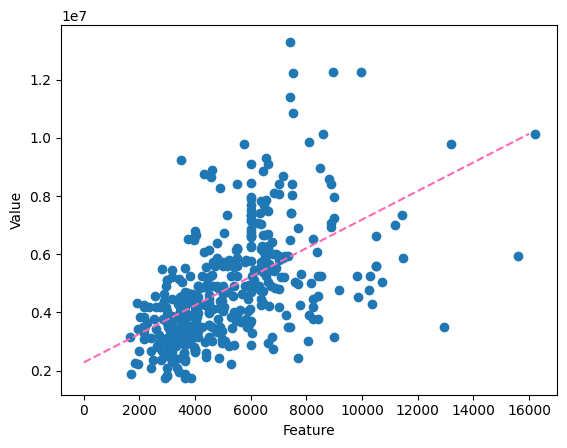

In [ ]:
w=np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
print(w)
xline=np.linspace(0,16000,10)
yline=w[1]*xline+w[0]
plt.plot(xline,yline,color="hotpink",linestyle='dashed')
plt.scatter(x_train[:,1],y_train)
plt.xlabel("Feature")
plt.ylabel("Value")
plt.show()

# Calculating training Error

In [ ]:
def trainerror(X,Y,w):
  y_pred=X.dot(w)
  out=0
  for i in range(X.shape[0]):
    out+= (y_pred[i]-Y[i])**2
  return out/X.shape[0]

print(f"Training Error is :{trainerror(x_train,y_train,w)}")

Training Error is :[2.56247771e+12]


In [ ]:
def testerror(x,y,w):
  y_pred=x.dot(w)
  out=0
  for i in range(x.shape[0]):
    out+= (y_pred[i]-y[i])**2
  return out/x.shape[0]

print(f"Testing Error is :{testerror(x_test,y_test,w)}")

from sklearn.metrics import r2_score
r2 = r2_score(y_test, x_test.dot(w))
print(f"R2 Score is :{r2}")

Testing Error is :[2.22500758e+12]
R2 Score is :0.19229082706134104


#Graph of line with test data


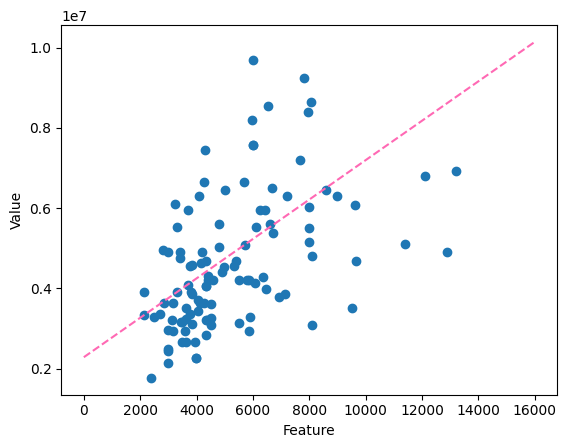

In [ ]:
plt.plot(xline,yline,color="hotpink",linestyle='dashed')
plt.scatter(x_test[:,1],y_test)
plt.xlabel("Feature")
plt.ylabel("Value")
plt.show()